<a href="https://colab.research.google.com/github/furewing/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_04_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91_%EC%A0%95%EC%A0%81%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 4. 웹 크롤링으로 데이터 수집 - 정적 웹크롤링

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

- **한글 폰트 지정하기**

In [1]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.family': 'Malgun Gothic',
plt.rcParams.update({'font.family': 'NanumGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

### 1) 웹 크롤링 기초

### 라이브러리 설치하기

In [ ]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

In [ ]:
# HTML과 XML 문서를 파싱하기 위한 파이썬 패키지
!pip install beautifulsoup4

In [9]:
# 동적 크롤링을 위한 셀레니움 설치
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00


In [12]:
# 동적 크롤링을 위한 크롬드라이버 자동설치 라이브러리 설치
!pip install chromedriver-autoinstaller

In [3]:
import requests
import bs4
import selenium
print(requests.__version__)
print(bs4.__version__)
print(selenium.__version__)

ModuleNotFoundError: No module named 'selenium'

### 2) 정적 크롤링(스크래핑)

#### 1.웹 페이지 가져오기

In [ ]:
import requests

requests.get("https://www.naver.com")

In [ ]:
import requests

response = requests.get("https://google.com")

# 응답 상태
print('#응답 상태: ', response.status_code)

# 응답 바이너리 원문
print('#응답 바이너리 원문: ', response.content)

# 응답 UTF-8로 인코딩된 문자열
print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# 응답 헤더
print('#응답 헤더: ', response.headers)

# 응답 헤더: 콘텐트 유형
print('#응답 헤더유형: ', response.headers['Content-Type'])

#응답 상태:  200
#응답 바이너리 원문:  b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="ZMRJfD9QhrQxEnYIWbdR5w">(function(){var _g={kEI:\'8W8oZuTiB53y0PEPjpeY0Ao\',kEXPI:\'0,1370478,2329813,658,361,478218,4998,23959,31560,2872,2891,3926,7828,61296,15324,781,1244,1,16916,65253,24052,6642,7596,1,42154,2,16395,342,23024,6700,41945,24673,33064,2,2,1,6959,19673,8155,23350,15545,6891,9779,42459,20198,36747,3801,2412,1548,28671,3030,15816,1804,7734,18098,21250,1428,87,120,13492,42867,5203198,11,7228,1347,731,349,5992242,2839368,1,1,1,1,2,1,2

#### 2.웹 페이지에서 정보 추출하기
- BeautifulSoup 라이브러리 사용하여 웹페이지에서 정보 추출하기
- 네이버 메인(https://www.naver.com/) > 검색어 입력(**눈물의여왕**) > 검색된 결과 페이지에서 **제목**만 추출

#### [예제] : Text 제목 정보 1개 가져오기 in (정적인 페이지)

* 뉴스 제목이 있는 위치 찾는 방법
    1. 크롬브라우저를 연다.
    2. Target URL =https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95 페이지를 연결한다.
    3. 키보드에서 F12 키를 눌러 크롬 개발자 도구를 연다
    4. 개발자 도구에서 마우스로 영역선택( )메뉴를 클릭하고 마우스를 뉴스 제목 부분에 놓고 클릭한다.
    5.마우스 오른쪽 버튼을 클릭하고 메뉴(Copy > copy selector)를 선택한다.
    6. 5에서 복사된 뉴스 제목이 있는 영역으 tag를 코드에 붙여넣는다.


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95'
print(url)

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    print(soup)
    title = soup.select_one('#sp_nws1 > div.news_wrap.api_ani_send > div > div.news_contents > a.news_tit')
    print(f'#title : {title}')
    print(f"#제목: {title.attrs['title']}")  # 제목 추출 : title.get_text()
else :
    print(response.status_code)
print('----------')

https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95
<!DOCTYPE html>
 <html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="눈물의여왕 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'눈물의여왕'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'눈물의여왕'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>눈물의여왕 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/

#### [예제] Text 정보 여러 개 가져오기 in (정적인 페이지)

In [4]:
import requests
from bs4 import BeautifulSoup

print('페이지 정보 추출하기-----')
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95'
print(url)

response = requests.get(url)

t_list, d_list, link_list = [], [], []
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ul = soup.select_one('ul.list_news') #공백에 있을 경우 . 사용
    # 제목, 링크
    # 위치찾기 : 해당 태크 링크(F12안에서) -. 오른쪽마우스 -> copy -> copy selector
    titles = ul.select('li > div > div > div.news_contents > a.news_tit')
    for title in titles:
        t_list.append(title.attrs['title'])
        link_list.append(title.attrs['href'])
#         print(title.get_text())
    # 상세 설명
    titles = ul.select('li > div > div > div.news_contents > div.news_dsc > div.dsc_wrap > a')
    for title in titles:
        d_list.append(title.get_text())
else :
    print(response.status_code)
print('페이지 정보 추출완료-----')
t_list, d_list, link_list

페이지 정보 추출하기-----
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95
페이지 정보 추출완료-----


(["몰래 훔쳐보고 평점 7.7점…中 '눈물의 여왕' 도둑시청 논란",
  '\'눈물의 여왕\' 또 불법시청..서경덕 "이젠 中당국이 나서야"',
  "[단독] 박성훈, '눈물의 여왕' 결말 앞두고 오늘(24일) '유퀴즈' 뜬다",
  '‘눈물의 여왕’ 크러쉬 OST, 음원차트 톱10',
  "'눈물의 여왕' 속 김수현, 미도 멀티포트 TV 빅 데이트 착용",
  '‘눈물의 여왕’ 대박났는데…김수현·김지원 인터뷰 안한다',
  '中, \'눈물의 여왕\'도 훔쳐본다… "부끄러움 못 느껴"',
  '\'눈물의 여왕\', 17일 종방연 한 번 더 연다…"일정 가능한 스태프·배우 참석" [공식입장]',
  "커피머신 한대에 600만원…'눈물의 여왕' 속 가전 정체는?",
  '\'눈물의 여왕\' 김수현→김지원, 20% 시청률 돌파에 "사랑합니다"'],
 ['tvN 드라마 \'눈물의 여왕\'이 인기를 끌고 있는 가운데 중국에서 또 \'도둑 시청\'을 해 논란이 일고 있다. 23일 서경덕 성신여대 교수는 자신의 페이스북을 통해 "최근 국내를 넘어 넷플릭스를 통해 세계적인 인기를 끌고 있는 드라마 \'눈물의 여왕\' 훔쳐보기가 중국에서 또 기승을 부리고 있다"고 지적했다. 그는...',
  '최근 국내를 넘어 세계적 인기를 끌고 있는 드라마 \'눈물의 여왕\'이 중국에서 또 \'훔쳐보기\'로 몸살을 앓고 있다. 23일 서경덕 성신여대 교수에 따르면 중국 콘텐츠 리뷰 사이트 \'더우반\'에는 \'눈물의 여왕\' 리뷰 화면이 만들어졌으며, 현재 4만6000여 건의 리뷰가 버젓이 남겨져 있다. 서 교수는 이에 대해 "영화...',
  "배우 박성훈이 '눈물의 여왕' 종영을 앞두고 '유 퀴즈 온 더 블럭'(이하 유퀴즈)에 출격한다. 24일 오전 OSEN 취재 결과, 박성훈은 이날 서울 모처에서 tvN 인기 예능 '유퀴즈' 녹화에 참석해 MC 유재석, 조세호와 만난다. '눈물의 여왕'의 종영이 코앞으로 다가온 만큼 박성훈이 어떤 비하인드와 에피소드를...",
  '‘눈물의 여왕’ 

In [5]:
# pandas DataFrame으로 나타내기
import pandas as pd

data = {'title': t_list, 'desc':d_list,'link':link_list}
df = pd.DataFrame(data)

df.to_csv('my_naver_news.csv', index=False) # 파일로 저장하기

df.head()

,title,desc,link
0,몰래 훔쳐보고 평점 7.7점…中 '눈물의 여왕' 도둑시청 논란,tvN 드라마 '눈물의 여왕'이 인기를 끌고 있는 가운데 중국에서 또 '도둑 시청'...,https://view.asiae.co.kr/article/2024042310394...
1,"'눈물의 여왕' 또 불법시청..서경덕 ""이젠 中당국이 나서야""",최근 국내를 넘어 세계적 인기를 끌고 있는 드라마 '눈물의 여왕'이 중국에서 또 '...,https://www.newsis.com/view/?id=NISX20240423_0...
2,"[단독] 박성훈, '눈물의 여왕' 결말 앞두고 오늘(24일) '유퀴즈' 뜬다",배우 박성훈이 '눈물의 여왕' 종영을 앞두고 '유 퀴즈 온 더 블럭'(이하 유퀴즈)...,http://www.osen.co.kr/article/G1112322946
3,"‘눈물의 여왕’ 크러쉬 OST, 음원차트 톱10",‘눈물의 여왕’ OST ‘미안해 미워해 사랑해’가 드라마 화제성과 더불어 파죽지세 ...,https://sports.khan.co.kr/news/sk_index.html?a...
4,"'눈물의 여왕' 속 김수현, 미도 멀티포트 TV 빅 데이트 착용",시청률 상승곡선을 타고 있는 드라마 '눈물의 여왕'이 역대급 시청률을 달성했다. t...,https://www.news1.kr/articles/5395105


#### **[실습] : 할리스 커피매장 정보 수집하기**
 - 매장정보 : https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=


In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

MAX = 100    # 총 가져올 건수
FILE = './hollys_매장정보.csv'

#[CODE 1]
def hollys_store(result):
    cnt, MAX_flag = 0, False
    for page in range(1,11):
#         Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
            cnt += 1
            print(f'[{cnt:0>3}] {store_name}  \t {store_sido}')
            if cnt == MAX:
                MAX_flag = True
                break
        if MAX_flag:
            break

    return

#[CODE 0]
def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv(FILE, encoding='cp949', mode='w', index=True)
    del result[:]
    return hollys_tbl


df = main()
df

Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=
[001] 왕십리역점  	 서울 성동구
[002] 강릉안목해변점  	 강원 강릉시
[003] 군산수송점  	 전북 군산시
[004] 광주운암점  	 광주 북구
[005] 구리돌다리점  	 경기 구리시
[006] 소월아트홀점  	 서울 성동구
[007] 송파거여역점  	 서울 송파구
[008] 경주주상절리점  	 경북 경주시
[009] (하)홍성휴게소점  	 충남 홍성군
[010] (상)홍성휴게소점  	 충남 홍성군
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=
[011] 부산사상광장점  	 부산 사상구
[012] 인천항국제여객터미널점  	 인천 연수구
[013] 분당파크타운점  	 경기 성남시 분당구
[014] 하남덕풍점  	 경기 하남시
[015] 대전오류점  	 대전 중구
[016] 계룡대점  	 충남 계룡시
[017] 대전타임월드점  	 대전 서구
[018] 구미오태DT점  	 경북 구미시
[019] 화정DI점  	 경기 고양시 덕양구
[020] 부산광복점  	 부산 중구
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=3&sido=&gugun=&store=
[021] 과천정보타운점  	 경기 과천시
[022] 양평북한강DI점  	 경기 양평군
[023] 완주삼봉점  	 전북 완주군
[024] 잠실새내역점  	 서울 송파구
[025] 화성남양점  	 경기 화성시
[026] 중랑역점  	 서울 중랑구
[027] 분당서울대병원점  	 경기 성남시 분당구
[028] 강변역점  	 서울 광진구
[029] 대구중동점  	 대구 수성구
[030] 오산궐동점  	 경기 오산시
https://www

,store,sido-gu,address,phone
0,왕십리역점,서울 성동구,"서울특별시 성동구 왕십리광장로 17 (행당동, 왕십리민자역사) 비트플렉스몰 3층 영...",02-2200-1303
1,강릉안목해변점,강원 강릉시,"강원특별자치도 강릉시 창해로14번길 34-1 (견소동) 견소동283-6,견소동132",070-7575-0184
2,군산수송점,전북 군산시,"전라북도 군산시 수송북로 22 수송동 831-1,1층",063-467-9500
3,광주운암점,광주 북구,광주광역시 북구 북문대로 184 (운암동) .,062-531-7711
4,구리돌다리점,경기 구리시,경기도 구리시 경춘로227번길 14 (인창동) 1층,031-564-4565
...,...,...,...,...
95,전주한옥마을점,전북 전주시 완산구,전라북도 전주시 완산구 은행로 16 (풍남동 1가 53-3) .,063-288-0801
96,(상)홍천휴게소R점,강원 홍천군,강원도 홍천군 화촌면 서울양양고속도로 83 .,None
97,부산시민공원점,부산 부산진구,"부산 부산진구 시민공원로 73, 푸드코트피크닉 범전동 200",.
98,충남도청점,충남 홍성군,충청남도 홍성군 홍북읍 신경리 553 .,041-631-4725


#### **[실습] :  텍스트 데이터를 토큰화하여 빈도수를 구하고 빈도수에 따른 워드클라우드 만들기**
- 앞에서 수집한 할리스 커피매장의 매장 위치 정보 중 지역(**sido-gu**) 정보를 이용하여 워드 클라우드 만들기
- 필요한 라이브러리 및 주의사항
    - 사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출
    - 단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.

In [11]:
# 사이킷런 설치하기
!pip install scikit-learn

In [ ]:
!pip install wordcloud

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

[('서울', 28), ('경기', 21), ('충남', 8), ('고양시', 7), ('전북', 6), ('강원', 5), ('부산', 5), ('중구', 5), ('양천구', 4), ('인천', 4)]


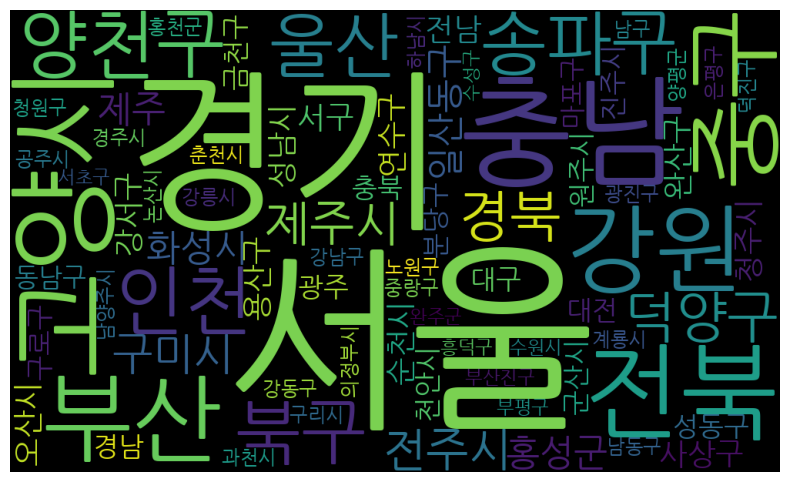

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):
    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


# 단어(토큰) 빈도수 막대 그래프 그리기
def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'./token_bar_graph.png')

# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩
    #font_path = 'malgun'  # C:/Windows/Fonts/                                  #window

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드.png')


# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['sido-gu'].to_list()
# print(corpus)

# 2.말뭉치를 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 3.단어(토큰) 빈도수 막대 그래프 그리기(상위 10개)
# draw_wordTokenCountGraph(feature_name[:10], count[:10])

# 3.워드 클라우드 만들기
make_wordcloud(feature_name, count)



---



### **[미션] : 네이버 뉴스 기사 제목을 워드클라우드로 만들기**
앞에서 정적크롤링으로 가져왔던 네이버 뉴스 기사 제목을 워드 클라우드로 만들어 보세요.

[('여왕', 10), ('눈물의', 10), ('김수현', 2), ('27일', 1), ('앞둔', 1), ('연다', 1), ('위하준', 1), ('음원차트', 1), ('이젠', 1), ('장소', 1)]


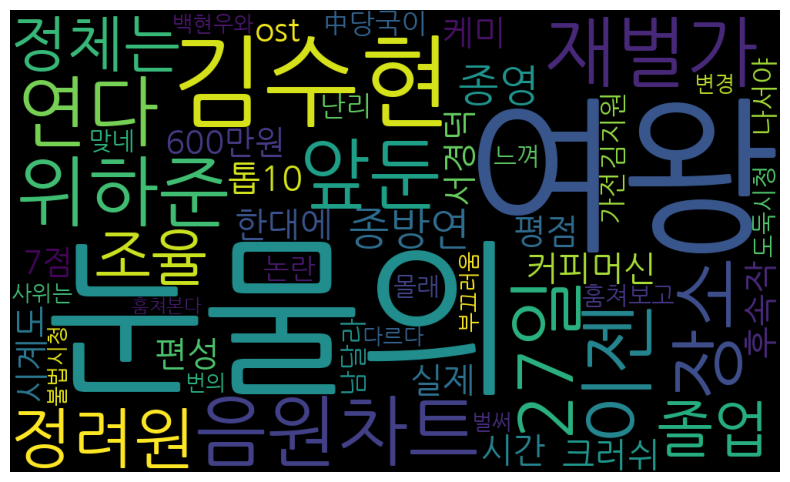

NameError: name 'wc' is not defined

In [ ]:
import pandas as pd

df = pd.read_csv('./my_naver_news.csv')
df


# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus1 = df['title'].to_list()


# 2.말뭉치를 딕셔너리(토큰, 빈도수)로 만들기
feature_name, count = get_wordTokenCount(corpus1)


# 3.딗셔너리 데이터로 워드 클라우드 만들기
make_wordcloud(feature_name, count)


# 4. 워드클라우드 이미지 파일로 저장하기
#wc.to_file(f'./워드클라우드1.png')




---



### **[미션] : 특정 웹 사이트 지정하여 정적크롤링 방법을 이용하여 TEXT 정보 추출하여 표로 만들기**
- 1. 자신이 원하는 웹 페이지를 정해서 100개 이상 텍스트 정보 추출하기
- 2. Pandas DataFrame 표로 나타내기
- 3. CSV file로 저장하기
  4. Slack에 코드 업로드하기

In [ ]:
import requests
from bs4 import BeautifulSoup

print('페이지 정보 추출하기-----')
url = 'https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EC%84%B8%EB%B8%90%ED%8B%B4'
print(url)

response = requests.get(url)

t_list, d_list, link_list = [], [], []
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ul = soup.select_one('ul.list_news') #공백에 있을 경우 . 사용
    # 제목, 링크
    # 위치찾기 : 해당 태크 링크(F12안에서) -. 오른쪽마우스 -> copy -> copy selector
    titles = ul.select('li > div > div > div.news_contents > a.news_tit')
    for title in titles:
        t_list.append(title.attrs['title'])
        link_list.append(title.attrs['href'])
#         print(title.get_text())
    # 상세 설명
    titles = ul.select('li > div > div > div.news_contents > div.news_dsc > div.dsc_wrap > a')
    for title in titles:
        d_list.append(title.get_text())
else :
    print(response.status_code)
print('페이지 정보 추출완료-----')
t_list, d_list, link_list


페이지 정보 추출하기-----
https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EC%84%B8%EB%B8%90%ED%8B%B4
페이지 정보 추출완료-----


(['세븐틴, 베스트 앨범 신곡 4곡 모두 뮤비 제작',
  '세븐틴 호시, 훈훈한 비주얼',
  '세븐틴, 발자취 심거나 남아공 장르 선보이거나',
  '세븐틴, 베스트앨범 선주문 300만 넘었다',
  '선주문 300만장…‘남다른’ 세븐틴',
  '[단독] 세븐틴 에스쿱스→장진 감독, 푸른 피의 사나이들 ‘찐팬구역’ 출격',
  '세븐틴 호시, 소녀들의 왕자님',
  '[포토] 세븐틴 호시, 마음담아 손하트',
  '포즈 취하는 세븐틴 호시',
  '세븐틴 호시, 귀여운 손하트'],
 ["그룹 세븐틴이 베스트 앨범 '17 이즈 라이트 히어'(17 IS RIGHT HERE)에 수록되는 신곡 4곡 전곡의 뮤직비디오를 제작했다고 소속사 플레디스엔터테인먼트가 24일 밝혔다. 세븐틴은 타이틀곡 '마에스트로'(MAESTRO)를 비롯해 유닛곡 '라라리'(LALALI)·'스펠'(Spell)·'청춘찬가' 뮤직비디오를 순차적으로...",
  '그룹 세븐틴 호시. ⓒ이혜영 기자 lhy@hankooki.com 그룹 세븐틴 호시가 23일 오후 성동구 모처에서 열린 샤넬 루쥬 알뤼르 팝업스토어 오픈 기념 포토콜 행사에 참석하고 있다. 이날 행사에는 뉴진스 민지, 세븐틴 호시, 스트레이키즈 승민, 샤이니 키, 레드벨벳 슬기, 몬스타엑스 아이엠, 오마이걸 유아가...',
  "대세 그룹 '세븐틴'(SVT)의 신곡 4개 음원 일부가 처음 공개됐다. 세븐틴은 23일 0시 소셜 미디어에 베스트 앨범 '세븐틴 이즈 라이트 히어(17 IS RIGHT HERE)' 하이라이트 메들리(하라메) 영상을 게재했다. 이 영상에는 타이틀곡 '마에스트로(MAESTRO)'와 유닛곡 '라라리(LALALI)', '스펠(Spell)', '청춘찬가' 등 베스트...",
  '그룹 세븐틴(에스쿱스, 정한, 조슈아, 준, 호시, 원우, 우지, 디에잇, 민규, 도겸, 승관, 버논, 디노)의 베스트 앨범 선주문량이 300만 장을 돌파했다. 22일 앨범 유통사 YG플러스에 따르면, 세븐틴 베스트 앨범 ‘17 IS RIGHT 

In [20]:
#mainContainer > div.content > div.section_home_search > div.search_item_wrap > div.item_list > div > div:nth-child(1) > a > div.cafe_info_area
#mainContainer > div.content > div.section_home_search > div.search_item_wrap > div.item_list > div > div:nth-child(2) > a

import requests
from bs4 import BeautifulSoup

print('페이지 정보 추출하기-----')
#url = 'https://section.cafe.naver.com/ca-fe/home/search/cafes?q=%EC%A0%95%EB%B3%B4&t=1713932081970'
url = 'https://section.blog.naver.com/BlogHome.naver?directoryNo=0&currentPage=1&groupId=0'
print(url)

header = {"user-agent": "Mozilla/5.0"}
response = requests.get(url, headers=header)

t_list, d_list, link_list = [], [], []
if response.status_code == 200:
     html = response.text
     soup = BeautifulSoup(html, 'html.parser')
     #soup = BeautifulSoup(html.text, 'html.parser')
     #print(soup)
     ul = soup.select_one('li.item') #공백에 있을 경우 . 사용
     print(ul)
     # 제목, 링크
     # 위치찾기 : 해당 태크 링크(F12안에서) -. 오른쪽마우스 -> copy -> copy selector
     #titles = ul.select('mainContainer > div.content > div.section_home_search > div.search_item_wrap > div.item_list > div > div:nth-child(1) > a > div.cafe_info_area > strong')
     titles = ul.select('ccontent > section > div.list_post_article')

#     for title in titles:
#         t_list.append(title.attrs['cafe_name'])
#         title.get_text()
# #        link_list.append(title.attrs['href'])
# #         print(title.get_text())
#     # 상세 설명
# #    titles = ul.select('li > div > div > div.news_contents > div.news_dsc > div.dsc_wrap > a')
#     # for title in titles:
#     #     d_list.append(title.get_text())
else :
  print(response.status_code)
# print('페이지 정보 추출완료-----')
#t_list, d_list, link_list


페이지 정보 추출하기-----
https://section.blog.naver.com/BlogHome.naver?directoryNo=0&currentPage=1&groupId=0
<li class="item">
                        설정한 아이디는 나중에 변경할 수 없으니 신중하게 입력해주세요.
                    </li>


In [6]:
import requests
from bs4 import BeautifulSoup

headers = <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
headers = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}

# 크롤링 대상 URL
url = "https://section.cafe.naver.com/ca-fe/home/search/cafes?q=%EC%A0%95%EB%B3%B4&t=1713944989760"

# HTTP 요청 보내기
response = requests.get(url)

# HTML 파싱
soup = BeautifulSoup(response.content, "html.parser")

# 카페명 추출
cafe_names = [cafe.text for cafe in soup.select(".CafeNameArea")]

# 결과 출력
for name in cafe_names:
    print(name)

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

In [13]:
import time
from selenium import webdriver
import csv
import pandas as pd
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_experimental_option("detach", True)

# 불필요한 에러 메시지 없애기
chrome_options.add_experimental_option("excludeSwitches", ["enable-logging"])

total_list=["제목","작성시간","조회"]

f=open('crawl.csv','w',encoding="utf-8",newline='')
wr=csv.writer(f)
wr.writerow([total_list[0],total_list[1],total_list[2]])
f.close()
i=0
while(True):
    origin_df=pd.read_csv('crawl.csv',encoding='utf-8')

    # 네이버 로그인 url
    url='https://nid.naver.com/nidlogin.login'
    id=""
    pw=""

    browser=webdriver.Chrome(options=chrome_options)
    browser.get(url)

    browser.implicitly_wait(2)

    # 로그인
    browser.execute_script("document.getElementsByName('id')[0].value=\'"+ id + "\'")
    browser.execute_script("document.getElementsByName('pw')[0].value=\'"+ pw + "\'")

    browser.find_element(by=By.XPATH,value='//*[@id="log.login"]').click()
    time.sleep(1)

    # 크롤링 하고자하는 url
    baseurl='https://cafe.naver.com/algisa'
    browser.get(baseurl)

    i=i+1

    clubid=13005023
    # 전체글
    boardtype="L"
    pageNum = i
    print(pageNum)
    userDisplay = 50

    browser.get(baseurl + 'ArticleList.nhn?search.clubid=' + str(clubid) + '&search.boardtype=' + str(boardtype) +'&search.page='+ str(pageNum) +'&userDisplay=' + str(userDisplay))
    browser.switch_to.frame('cafe_main') #iframe으로 접근

    soup = bs(browser.page_source ,'html.parser')
    soup = soup.find_all(class_ = 'article-board m-tcol-c')[1]# 네이버 카페 구조 확인후 게시글 내용만 가저오기

    datas = soup.select("#main-area > div:nth-child(4) > table > tbody > tr")

    for data in datas:
        article_title = data.find(class_= "article")
        article_date=data.find(class_='td_date')
        article_view=data.find(class_='td_view')

        if article_title == None :
             article_title = "null"
        else:
            article_title = article_title.get_text().strip()

        if article_date ==None:
            article_date="null"
        else:
            article_date = article_date.get_text().strip()

        if article_view == None:
            article_view="null"
        else:
            article_view = article_view.get_text().strip()

        f = open('crawl.csv', 'a+', newline='', encoding = "utf-8")# 문자 인코딩 -> euc-kr 형태로 변경하여 사용. 안되면 utf-8로 변경 후 진행
        wr = csv.writer(f)
        wr.writerow([article_title,article_date,article_view ])
        f.close()

    print('종료')

ModuleNotFoundError: No module named 'webdriver_manager'

In [14]:
!pip install ChromeDriverManager

INFO: pip is looking at multiple versions of chromedrivermanager to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement pywin32 (from chromedrivermanager) (from versions: none)
ERROR: No matching distribution found for pywin32


----------